In [4]:
import random
import numpy as np
import pandas as pd
from numpy.random import randn, randint
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [5]:
# generate random data matrix
random.seed(0)
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

In [6]:
# form data from noisy linear model
wtrue = randn(d)
y = X.dot(wtrue) + .1*randn(n)

In [7]:
# look at least squares objective as a function of w
def f(w):
    return norm(y - X.dot(w))**2

def gradf(w):
    return 2*X.T @ (X @ w) - 2*X.T @ y

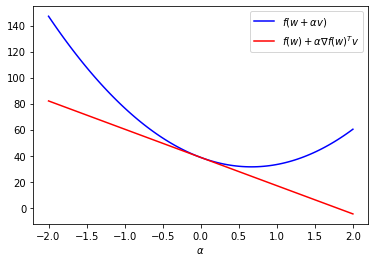

In [8]:
# gradient at w approximates f(w) near w
w = randn(d)
v = randn(d)
alphas = np.linspace(-2,2,100)
plt.plot(alphas, [f(w + alpha*v) for alpha in alphas], color='b', 
     label=r"$f(w + \alpha v)$")
plt.plot(alphas, [f(w) + alpha*gradf(w).dot(v) for alpha in alphas], color='r', 
      label=r"$f(w) + \alpha \nabla f(w)^T v$")
plt.xlabel(r"$\alpha$")
plt.legend()

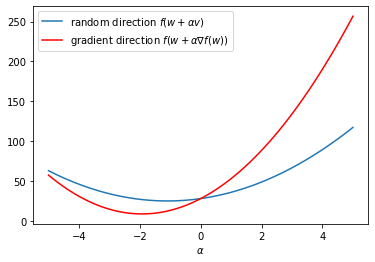

In [9]:
# function decreases fastest in the -∇f(w) direction
w = randn(d)
v = randn(d)
v_normalized = v/norm(v)
g = gradf(w)
g_normalized = g/norm(g)
alphas = np.linspace(-5,5,100)
plt.plot(alphas, [f(w + alpha*v_normalized) for alpha in alphas], 
     label = r"random direction $f(w + \alpha v)$")
plt.plot(alphas, [f(w + alpha*g_normalized) for alpha in alphas], color='r', 
         label= r"gradient direction $f(w + \alpha \nabla f(w))$")
plt.xlabel(r"$\alpha$")
plt.legend()
# notice: compared to blue line, red line always goes down faster to the left and up faster to the right

# gradient descent

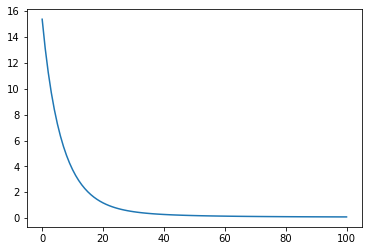

In [10]:
"""This function implements gradient descent for the function f with gradient ∇f"""
def gradient_descent(f, gradf,
                     alpha = .01,      # small constant step size - try other values!
                     w = np.zeros(d),     # start at a random w
                     maxiters = 100    # maximum number of iterations 
                     ):
    fks = []  # a list to record all the values f(w) we see
    fks.append(f(w)) # record the initial value

    # start descending!
    for k in range(maxiters):
        w = w - alpha*gradf(w)       # take a gradient step
        fks.append(f(w))             # record its value
    return w, fks

w, fks = gradient_descent(f, gradf, alpha = .01)

plt.plot(fks, label="sum of square errors")
#plt.semilogy(fks, label="sum of square errors")
#plt.loglog(fks, label="sum of square errors")

# Armijo rule

Text(0.5, 0, '$\\alpha$')

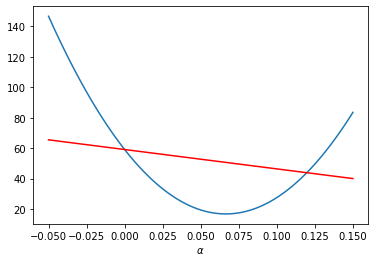

In [11]:
# function decreases fastest in the -∇f(w) direction
random.seed(1)

w = randn(d)
g = gradf(w)
c = .1
alphas = .05*np.linspace(-1,3,100)
plt.plot(alphas, [f(w - alpha*g) for alpha in alphas], 
     label = r"$f(w - \alpha \nabla f(w))$")
plt.plot(alphas, [f(w) - c*alpha*norm(g)**2 for alpha in alphas],color='r', 
         label=r"$f(w) - c\alpha \|\nabla f(w)\|^2$")
plt.xlabel(r"$\alpha$")


# Gradient descent with linesearch

Poll: gradient descent with linesearch will converge in ____ iterations than without
* A. more 
* B. fewer

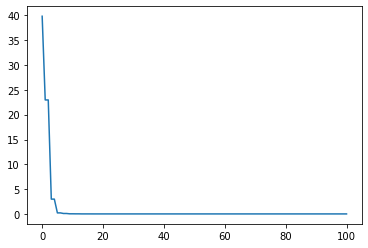

In [12]:
"""This function implements gradient descent with linesearch for the function f with gradient ∇f"""
def gradient_descent_linesearch(f, gradf,
                                alpha = 1,      # initial step size - try other values!
                                w = randn(d),     # start at a random w
                                maxiters = 100,   # maximum number of iterations 
                                c = .01            # Armijo sufficient decrease
                                ):

    fks = []  # a list to record all the values f(w) we see
    fw = f(w)
    fks.append(fw) # record the initial value
    g = gradf(w)
    alpha0 = alpha
    
    # start descending!
    for k in range(maxiters):
        w_new = w - alpha*g      # take a gradient step
        fw_new = f(w_new)
        while fw_new > fw - c*alpha*norm(g)**2:
            alpha /= 2
            w_new = w - alpha*g      # take a gradient step
            fw_new = f(w_new)
        w, fw, g = w_new, fw_new, gradf(w)
        alpha = alpha0
        fks.append(fw)
    return w, fks

w, fks = gradient_descent_linesearch(f, gradf, alpha = 1, c = .01)

plt.plot(fks, label="sum of square errors")
# plt.semilogy(fks, label="sum of square errors")
# plt.loglog(fks, label="sum of square errors")

# Stochastic gradient

In [13]:
"""
This function implements the stochastic gradient method
for the function sum_i f(x_i, y_i; w), 
where f has gradient wrt w gradf(X,y,w)
"""
def sgd(gradf, 
        data,                # an iterable [(X_1, y_1), ...]
        w,                   # initial guess for w
        alpha = .01,         # small constant step size - try other values!
        maxiters = 100,      # maximum number of iterations 
        f_validation = None, # evaluate w on a validation set
        validation_freq = 1  # compute value on validation set every validation_freq iterations
        ):
    fks = []  # a list to record the validation values f(w) we see

    # start descending!
    k = 0
    for X,y in data:
        
        # stopping condition
        if k > maxiters:
            break
        
        # logging: record value on validation set
        if (f_validation is not None) & k%validation_freq==0:
            fks.append(f_validation(w))

        # iterate
        w = w - alpha*gradf(X,y,w)       # take a gradient step
        k += 1                           # increment k
    return w, fks

## Apply SGD to a random synthetic dataset

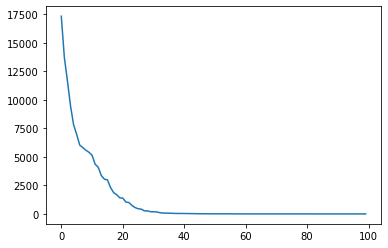

In [22]:
n,d = 500,20
X = randn(n,d)
wtrue = randn(d)
y = X.dot(wtrue) + .1*randn(n)

def random_chunk(X,y,size):
    n = len(y)
    s = randint(n, size=size)
    return X[s,:], y[s]

"""f_validation evaluates the objective on the whole dataset"""
def f_validation(w):
    return norm(y - X.dot(w))**2

"""gradf evaluates the gradient on the given chunk"""
def gradf(X,y,w):
    return 2*X.T @ (X @ w) - 2*X.T @ y

maxiters = 100
data = [random_chunk(X,y,5) for i in range(maxiters)]

w, fks = sgd(gradf, data, w = np.zeros(d), f_validation=f_validation, 
             validation_freq=1, maxiters=maxiters)

plt.plot(fks)

## apply SGD to a large csv
Here we read sequential (not random) chunks of the file to compute each gradient step

In [25]:
# generate a (random) large csv 
file_name = "random.csv"
n,d = 10000, 10
X = randn(n,d)
y = X@randn(d,1)
Z = np.hstack([y,X])
df = pd.DataFrame(Z)
df.to_csv(file_name)

In [27]:
for chunk in pd.read_csv(file_name, chunksize=5):
    print(chunk)
    break

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -2.898365  0.343570  1.487808 -0.947529 -1.711902 -0.831632   
1           1  3.516984 -0.275772  0.338983 -1.518109  0.828724 -0.894747   
2           2  0.695540 -1.285947  0.726503 -0.585661  1.033073 -0.895078   
3           3  1.664532 -0.922606 -0.550442  1.891081  0.199615 -0.107702   
4           4 -0.375763  0.373702 -1.096575 -0.398709  0.270665 -0.083821   

          6         7         8         9        10  
0 -0.131644 -0.503776  1.049698  1.351236 -0.685529  
1  0.275944 -1.424921 -0.900341  1.388891  2.069720  
2 -1.197002  0.742137  0.193761  0.655190 -0.256913  
3  0.146150  0.185635 -1.813377  0.973152 -0.219059  
4  1.108432 -1.793973  0.242327 -0.632688  2.011036  


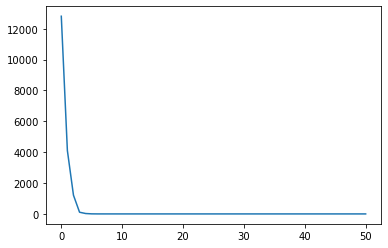

In [33]:
data_validation = pd.read_csv(file_name, nrows=1000)
X_validation, y_validation = data_validation.iloc[:,2:], data_validation.iloc[:,1]

"""f_validation evaluates the objective on the whole dataset"""
def f_validation(w):
    return norm(y_validation - X_validation.dot(w))**2

"""gradf evaluates the gradient on the given chunk"""
def gradf(X,y,w):
    return 2*X.T @ (X @ w) - 2*X.T @ y

maxiters = 100
data = [(chunk.iloc[:,2:], chunk.iloc[:,1]) for chunk in pd.read_csv(file_name, chunksize=20)]

w, fks = sgd(gradf, data, w=np.zeros(d), 
             f_validation=f_validation, 
             validation_freq=10, maxiters=maxiters)

plt.plot(fks)

# preprocess some large datasets

In [15]:
# import tensorflow.compat.v2 as tf
# import tensorflow_datasets as tfds

# # Construct a tf.data.Dataset
# ds = tfds.load('higgs', split='train', shuffle_files=True)

# # Build your input pipeline
# ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
# for example in ds.take(1):
#   print(example)

In [17]:
# dr['df'].to_csv('yaleemmlc.csv')

In [2]:
# pytorch utils
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

Below we have to call `.float()` to reconcile the default types of NumPy and PyTorch. NumPy defaults to float64 ("double") on a 64-bit system. PyTorch models default to float32 ("float") as GPUs can do up to 64x the operations per clock cycle when using float32 instead of float64. 

[CUDA operations per cycle comparison](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#arithmetic-instructions)

In [3]:
# method 4: PyTorch via SGD

def TorchLinRegModel(n : int = 2):
    """Create a simple linear regression model in PyTorch. Note that
    we're manually including the bias in this demo."""
    return nn.Linear(in_features=n, out_features=1, bias=False)

model = TorchLinRegModel()
model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=5e-6)
loss_function = nn.MSELoss()

n_epochs = 5000
batch_size = 8

for epoch in range(n_epochs):
    # Let's do a random order after converting to a torch array
    shuffled_indices = torch.randperm(x.shape[0])
    for batch in range(0, x.shape[0], batch_size):
        sample_idxs = shuffled_indices[batch:batch+batch_size]
        
        # Read minibatch data. PyTorch models default to float32  
        # so we need to convert from double precision to float32
        tensor = torch.from_numpy(X[sample_idxs, :]).float()
        output = model(tensor)
        
        batch_labels = torch.from_numpy(y[sample_idxs]).float()
        batch_labels = batch_labels.view(-1, 1)
        
        # loss.backward() calculates the gradient of the loss with
        # respect to the weights
        loss = loss_function(output, batch_labels)
        loss.backward()
        
        # optimizer.step() moves in the direction of the gradient
        # based on the learning rate (i.e. step size)
        optimizer.step()
        
        # PyTorch is still saving our past gradient even though we 
        # changed our model parameters. Clearing them here prevents
        # us from accidentally applying them again.
        optimizer.zero_grad()
        
        
w = list(model.parameters())[0][0].detach().numpy()
w

NameError: name 'x' is not defined